In [3]:
! pip install statsmodels 
! pip install patsy

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings 
warnings.filterwarnings('ignore')

In [33]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [10]:
data = pd.read_csv('AirPassengers.csv')

In [11]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [14]:
data['Month']=data['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [15]:
ts = data['#Passengers']

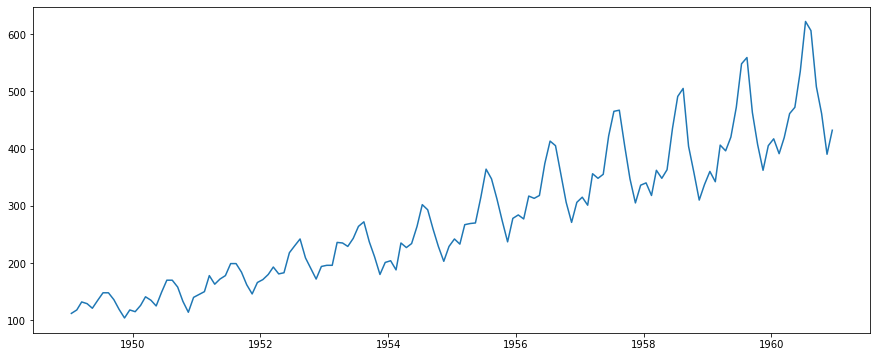

In [16]:
plt.plot(ts)

In [17]:
ts_log = np.log(ts)

In [50]:
def test_stationarity(timeseries):
    rollmean= timeseries.rolling(window=52,center=False).mean()
    rollstd= timeseries.rolling(window=52,center=False).std()
    
    orig = plt.plot(timeseries,color='blue',label='Orignal')
    mean = plt.plot(rollmean,color='red',label='Rolling Mean')
    std = plt.plot(rollstd,color='green',label='Rolling std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standart Deviation")
    plt.show(block=False)
    
    print('Results of Dickey Fuller Test:')
    dftest= adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Static','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

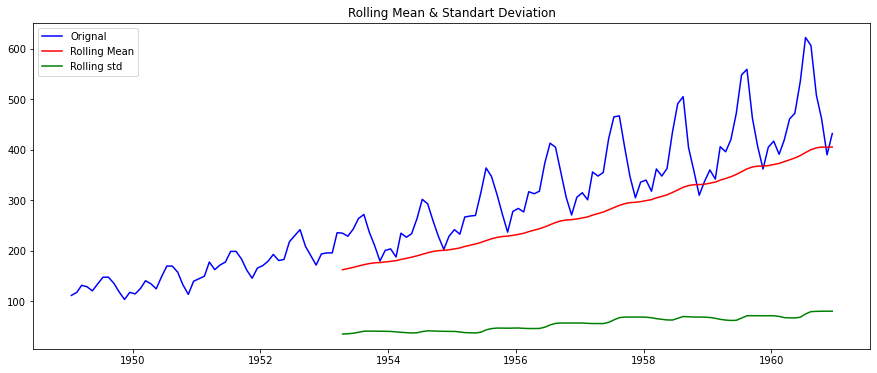

Results of Dickey Fuller Test:
Test Static                      0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [51]:
test_stationarity(data['#Passengers'])

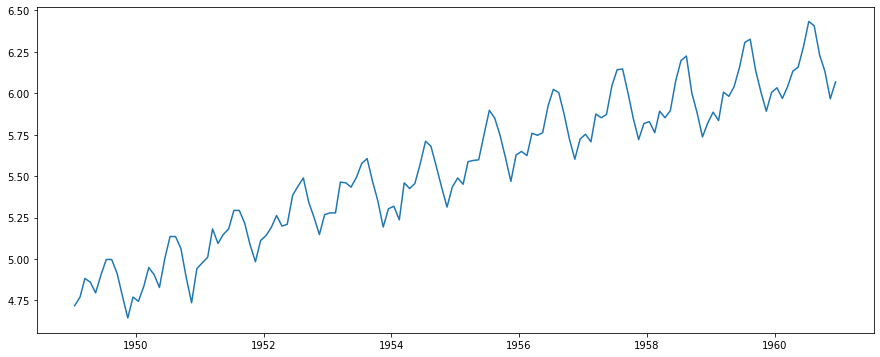

In [52]:
plt.plot(ts_log)

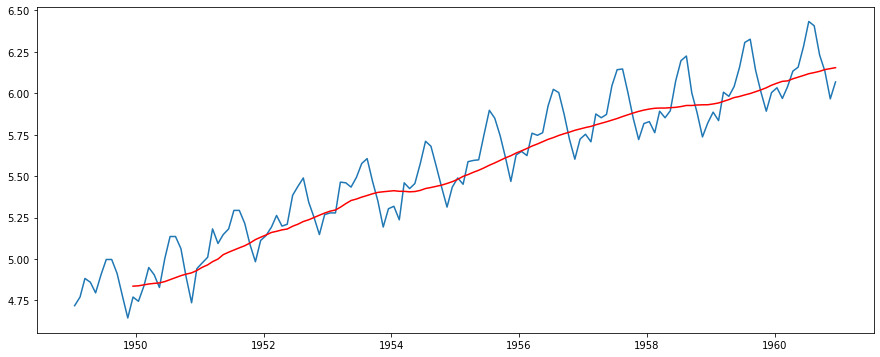

In [53]:
movingAverage= ts_log.rolling(window=12).mean()
movingstd= ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage,color='red')

In [54]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

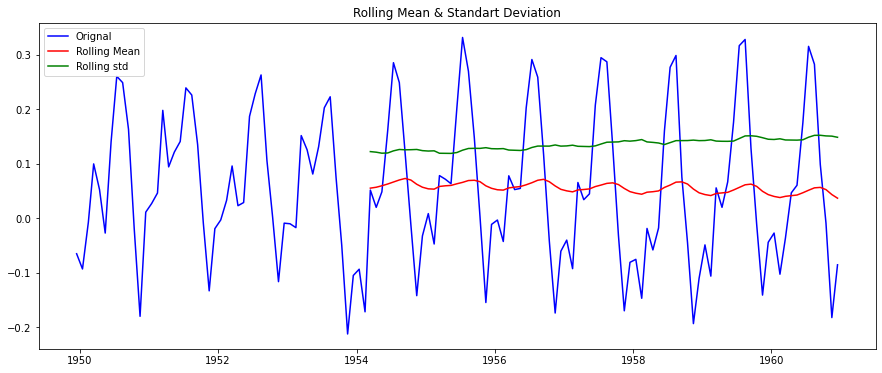

Results of Dickey Fuller Test:
Test Static                     -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [55]:
test_stationarity(ts_log_mv_diff)

In [34]:
#Time Series Forecasting using ACF and PACF plotting

In [38]:
data = pd.read_csv('AirPassengers.csv')
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [39]:
data['Month']=data['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [42]:
ts = data['#Passengers']

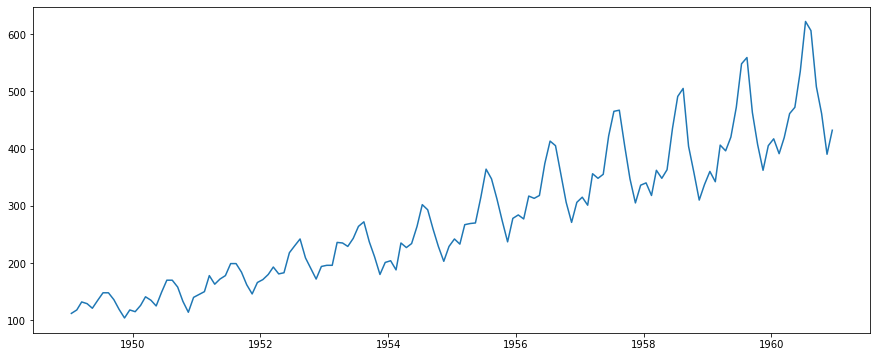

In [43]:
plt.plot(ts)

In [44]:
ts_log = np.log(ts)

In [47]:
def test_stationarity(timeseries):
    rollmean= timeseries.rolling(window=52,center=False).mean()
    rollstd= timeseries.rolling(window=52,center=False).std()
    
    orig = plt.plot(timeseries,color='blue',label='Orignal')
    mean = plt.plot(rollmean,color='red',label='Rolling Mean')
    std = plt.plot(rollstd,color='green',label='Rolling std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standart Deviation")
    plt.show(block=False)
    
    print('Results of Dickey Fuller Test:')
    dftest= adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Static','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

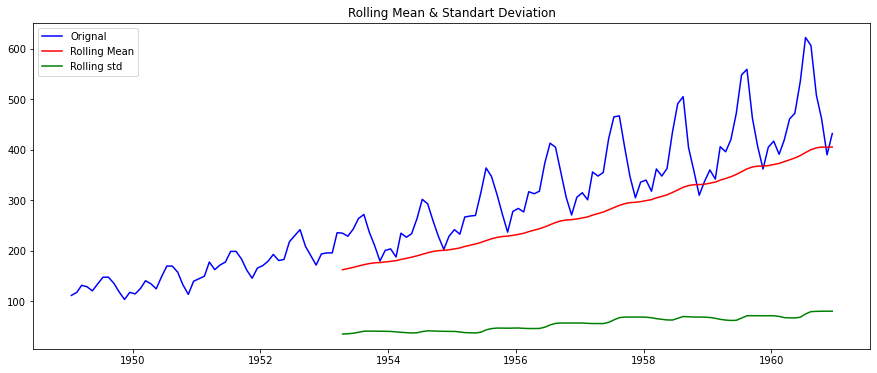

Results of Dickey Fuller Test:
Test Static                      0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [48]:
test_stationarity(data['#Passengers'])

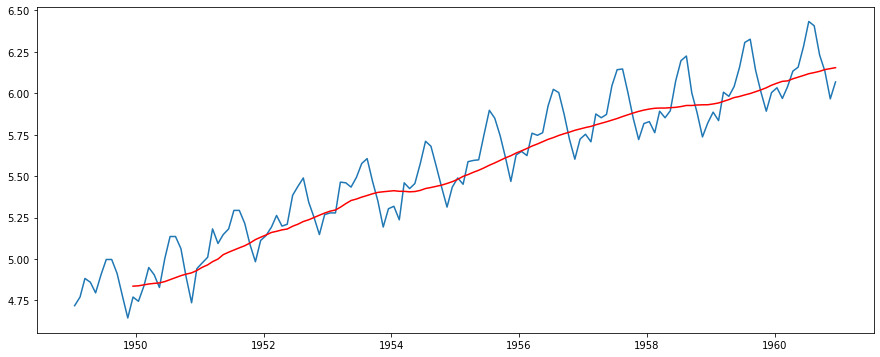

In [56]:
movingAverage= ts_log.rolling(window=12).mean()
movingstd= ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage,color='red')

In [57]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

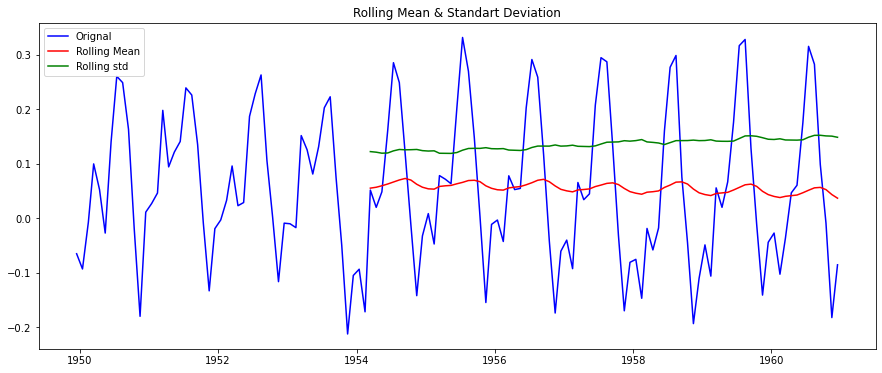

Results of Dickey Fuller Test:
Test Static                     -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [58]:
test_stationarity(ts_log_mv_diff)